In [40]:
import numpy as np
import matplotlib.pyplot as plt
from markovchain import MarkovChain

# Procesos de Markov

Los procesos de Markov estan regidos por la condicion de que el estado actual solo depende del estado anterior.

$$
P(X_{n + 1} = x | X_n = x_n)
$$

Supongamos que tenemos los estados $A$ y $B$

<b>Ejemplo</b>: supongamos que tenemos una maquina que cuando la verificamos puede estar en estado A (funcionando) o estado B (rota).

P(A/B) es la probabilidad de que dado que estamos en el estado B pasemos al estado A.

### Matriz de Markov

Matriz de cambio de estado.

$$
P =
\begin{bmatrix}
P(A / A) & P(B / A) \\
P(A / B) & P(B / B) \\
\end{bmatrix}
=
\begin{bmatrix}
P_{AA} & P_{AB} \\
P_{BA} & P_{BB} \\
\end{bmatrix}
$$

<b>Nota</b>: las filas suman 1.

<b>Nota</b>: Es posible calcular la probabilidad de que el sistema se encuentre en cierto estado luego de cierta cantidad de pasos.

$$
P(A/A) + P(B/A) = 1
$$

$$
P(A/B) + P(B/B) = 1
$$

#### Ejemplo

In [41]:
P_AA = 0.95
P_AB = 0.05
P_BA = 0.4
P_BB = 0.6

In [53]:
if (P_AA + P_AB != 1):
    raise BaseException('las probabilidades no suman 1')
if (P_BA + P_BB != 1):
    raise BaseException('las probabilidades no suman 1')

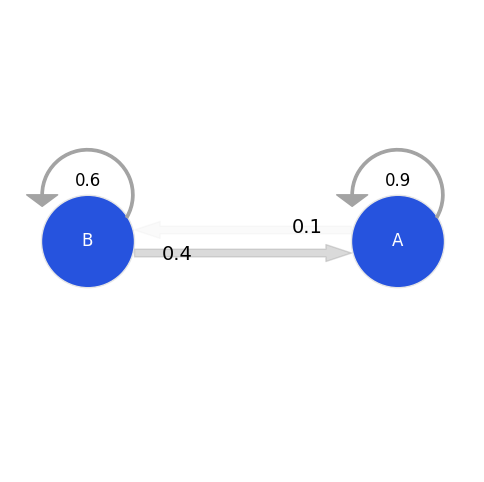

In [57]:
P_ = np.array([[P_AA, P_AB], [P_BA, P_BB]])
mc = MarkovChain(P_, ['A', 'B'])
mc.draw()

Calcular la probabilidad de que la maquina este rota luego de dos verificaciones.

Hay dos caminos:

A -> B y B -> B

B -> A y A -> B

##### Primera forma de calcularlo

$$
P^{Dos pasos}_{AB} = P_{AB} P_{BB} + P_{AA} P_{AB}
$$

In [59]:
P_AB_dos_pasos = (P_AB * P_BB) + (P_AA * P_AB)
P_AB_dos_pasos

0.0775

##### Segunda forma de calcularlo

Multiplicar la matriz dos veces nos da las probabilidades luego de dos pasos.

$$
P =
\begin{bmatrix}
P^{Dos pasos}_{AA} & P^{Dos pasos}_{AB} \\
P^{Dos pasos}_{BA} & P^{Dos pasos}_{BB} \\
\end{bmatrix}
$$

In [45]:
P = np.matrix('{} {};{} {}'.format(P_AA, P_AB, P_BA, P_BB))
P

matrix([[0.95, 0.05],
        [0.4 , 0.6 ]])

In [46]:
P * P

matrix([[0.922, 0.077],
        [0.62 , 0.38 ]])

Vemos entonces en la matriz que $P^{Dos pasos}_{AB}$ es 0.077, lo mismo que haciendo el calculo manual.

### Distribucion Estacionaria

Se llama distribucion estacionaria a la distribucion de probabilidades que quedaria si hicieramos infinitos pasos, es decir cual seria la probabilidad de estar en cada estado luego de infinitos pasos.

$$
\vec{\pi} = (\pi_1, \pi_2, ..., \pi_n)
$$

<b>Nota</b>: si aplicamos un paso mas a la distribucion estacionaria esta queda igual.

Por lo tanto:

$$
\vec{\pi} P = \vec{\pi}
$$

Esta expresion matematica nos servira para encontrar la distribucion estacionaria analiticamente.

$$
\vec{\pi} \begin{bmatrix}
P_{AA} & P_{AB} \\
P_{BA} & P_{BB} \\
\end{bmatrix} =
 \vec{\pi}
$$

$$
(\pi_1, \pi_2) \begin{bmatrix}
P_{AA} & P_{AB} \\
P_{BA} & P_{BB} \\
\end{bmatrix} = (\pi_1, \pi_2)
$$

Entonces:

$$
P_{AA} \pi_1  + P_{BA} \pi_2 = \pi_1
$$

$$
P_{AB} \pi_1  + P_{BB} \pi_2 = \pi_2
$$

La otra condicion que hay que pleantear es:

$$
\pi_1 + \pi_2 = 1
$$

Indicando las probabilidades:

$$
0.95 \pi_1  + 0.4 \pi_2 = \pi_1
$$

$$
0.05 \pi_1  + 0.6 \pi_2 = \pi_2
$$

Despejando:

$$
0.4 \pi_2 = \pi_1 - 0.95 \pi_1
$$

$$
0.4 \pi_2 = 0.05 \pi_1
$$

$$
8 \pi_2 = \frac{0.4 \pi_2}{0.05} = \pi_1
$$

De la primer ecuacion:

$$
\pi_1 = 8 \pi_2
$$

Reemplazo en la ecuacion de suma 1:

$$
\pi_1 + \pi_2 = 1
$$

$$
8 \pi_2 + \pi_2 = 1
$$

$$
9 \pi_2 = 1
$$

$$
\pi_2 = \frac{1}{9} = 0.11
$$

$$
\pi_1 + 0.11 = 1
$$

$$
\pi_1 = 1 - 0.11
$$

$$
\pi_1 = 0.89
$$

In [105]:
P ** 100

matrix([[0.889, 0.111],
        [0.889, 0.111]])